### Prepare and merge boston_2016 and weather_hourly_boston data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import pandas as pd
#import datetime
from datetime import date, time, datetime, timedelta

Import boston_2016 data to boston Dataframe

In [186]:
path_to_data = "C:\\Users\\ElenaProgrammer\\Downloads\\DSML-MMA_TEE-main\\DSML-MMA_TEE-main\\boston_2016.csv"
boston = pd.read_csv(path_to_data)
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   start_time          1236203 non-null  object
 1   end_time            1236203 non-null  object
 2   start_station_id    1236203 non-null  int64 
 3   end_station_id      1236203 non-null  int64 
 4   start_station_name  1236203 non-null  object
 5   end_station_name    1236203 non-null  object
 6   bike_id             1236203 non-null  int64 
 7   user_type           1236203 non-null  object
dtypes: int64(3), object(5)
memory usage: 75.5+ MB


### No null values
###
### start_time and end_time needs to be converted to datetime 
### trip_time as timedelta of start_time and end_time
### check time_delta values for plausibility, like negative trip times or very long trips over the bike boworring time limit 
### create keys for merging with weather data: date, hour, minute
### visualize some data for better understanding

In [187]:
boston

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer
...,...,...,...,...,...,...,...,...
1236198,2016-12-31 23:01:46.2540,2016-12-31 23:14:20.6250,8,33,Union Square - Brighton Ave at Cambridge St,Kenmore Square,230,Subscriber
1236199,2016-12-31 23:14:21.2330,2016-12-31 23:18:03.1850,190,6,Nashua Street at Red Auerbach Way,Cambridge St at Joy St,1420,Subscriber
1236200,2016-12-31 23:15:38.5800,2016-12-31 23:24:43.0190,33,36,Kenmore Square,Copley Square - Dartmouth St at Boylston St,230,Subscriber
1236201,2016-12-31 23:20:35.7960,2016-12-31 23:27:58.5830,90,141,Lechmere Station at Cambridge St / First St,Kendall Street,74,Subscriber


In [188]:
### change boston start_time and end_time from object to datetime, remove microseconds

boston["start_time"] = pd.to_datetime(boston["start_time"])
boston["start_time"] = boston["start_time"].apply(lambda x: x.replace(microsecond = 0))

boston["end_time"] = pd.to_datetime(boston["end_time"])
boston["end_time"] = boston["end_time"].apply(lambda x: x.replace(microsecond = 0))

In [189]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_time          1236203 non-null  datetime64[ns]
 1   end_time            1236203 non-null  datetime64[ns]
 2   start_station_id    1236203 non-null  int64         
 3   end_station_id      1236203 non-null  int64         
 4   start_station_name  1236203 non-null  object        
 5   end_station_name    1236203 non-null  object        
 6   bike_id             1236203 non-null  int64         
 7   user_type           1236203 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 75.5+ MB


In [190]:
### checck if start_time is greater than end_time
#len(boston.loc[boston.start_time >= boston.end_time])

In [191]:
### add the trip duration as timedelta for each tour

boston["trip_duration"] = boston["end_time"] - boston["start_time"]
boston

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_duration
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber,0 days 00:32:19
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber,0 days 00:32:08
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber,0 days 00:30:14
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber,0 days 00:29:49
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer,0 days 00:15:41
...,...,...,...,...,...,...,...,...,...
1236198,2016-12-31 23:01:46,2016-12-31 23:14:20,8,33,Union Square - Brighton Ave at Cambridge St,Kenmore Square,230,Subscriber,0 days 00:12:34
1236199,2016-12-31 23:14:21,2016-12-31 23:18:03,190,6,Nashua Street at Red Auerbach Way,Cambridge St at Joy St,1420,Subscriber,0 days 00:03:42
1236200,2016-12-31 23:15:38,2016-12-31 23:24:43,33,36,Kenmore Square,Copley Square - Dartmouth St at Boylston St,230,Subscriber,0 days 00:09:05
1236201,2016-12-31 23:20:35,2016-12-31 23:27:58,90,141,Lechmere Station at Cambridge St / First St,Kendall Street,74,Subscriber,0 days 00:07:23


In [192]:
###check unique values
boston.nunique()

start_time            1176852
end_time              1175109
start_station_id          189
end_station_id            189
start_station_name        276
end_station_name          276
bike_id                  1802
user_type                   2
trip_duration           14031
dtype: int64

### 189 distinct start and end station_ids, but 276 distinct start and end station_names 
### 1802 bike ids
### 2 User types

In [193]:
boston.groupby('start_station_id').start_station_name.nunique()

start_station_id
1      1
3      2
4      2
5      2
6      2
      ..
215    2
216    1
217    1
218    2
219    2
Name: start_station_name, Length: 189, dtype: int64

In [194]:
boston.groupby('start_station_id').start_station_name.unique()

start_station_id
1                                [18 Dorrance Warehouse]
3      [Colleges of the Fenway, Colleges of the Fenwa...
4      [Tremont St. at Berkeley St., Tremont St at E ...
5      [Northeastern U / North Parking Lot, Northeast...
6      [Cambridge St. at Joy St., Cambridge St at Joy...
                             ...                        
215    [The Eddy at New Street, The Eddy - New St at ...
216                            [Glendon St at Condor St]
217    [Orient Heights T Stop - Bennington St at Sara...
218    [Watermark Seaport, Watermark Seaport - Boston...
219    [Central Square East Boston - Porter Street at...
Name: start_station_name, Length: 189, dtype: object

### Some station ids have 2 station names assigned, possibly because they were renamed
### for example "The Eddy at New Street" and "The Eddy - New St at Sumemer St" with station_id 215

###
### trip duration analysis

In [195]:
print(boston["trip_duration"].max())

346 days 03:14:39


In [196]:
print(boston["trip_duration"].min())

-1 days +23:06:24


In [197]:
print(boston["trip_duration"].mean())

0 days 00:22:45.223969687


### max trip duration almost a year and min duration negative, cleaning needed

https://help.bluebikes.com/hc/en-us/articles/360034926492-How-long-can-I-keep-a-bike-out-
https://help.bluebikes.com/hc/en-us/articles/360034926452-What-if-I-keep-a-bike-out-too-long-

### longest pass allows 2 hours, every 30 minutes cost extra 2,5 USD or 2 USD (Income eligible members)
### single rides 30 min
### monthly and anual membership 45 min 
### adventure pass up to 2 hours
### Income eligible members (qualified for a discounted monthly or annual memberships) 60 min

### if the bike is not returned after 24 hours, a stolen/lost bike fee will be charged of 1200 USD + tax
###
### remove negative durations and durations over 24 hours

In [198]:
### define some timedeltas for trip_duration check

### time_delta for 0 Minutes
date1 = pd.Timedelta(pd.offsets.Minute(0))

### time_delta for 2 Hours
date2 = pd.Timedelta(pd.offsets.Hour(2))

### time_delta for 1 Day
date3 = pd.Timedelta(pd.offsets.Day(1))


In [199]:
### nb. of trips over 24 hours
len(boston.loc[boston.trip_duration > date3])

1079

In [200]:
### nb. of trips with negaive time
len(boston.loc[boston.trip_duration < date1])

3

In [201]:
### nb. of trips over 2 hours 
len(boston.loc[boston.trip_duration > date2])

8627

In [202]:
### nb. of trips over 2 hours and under 24 hours
print((len(boston.loc[boston.trip_duration > date2]) - len(boston.loc[boston.trip_duration > date3]) ))

7548


In [203]:
bostonC = boston[(boston["trip_duration"] > date1) & (boston["trip_duration"] < date3)]
bostonC.reset_index(drop = True, inplace = True)
bostonC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235121 entries, 0 to 1235120
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1235121 non-null  datetime64[ns] 
 1   end_time            1235121 non-null  datetime64[ns] 
 2   start_station_id    1235121 non-null  int64          
 3   end_station_id      1235121 non-null  int64          
 4   start_station_name  1235121 non-null  object         
 5   end_station_name    1235121 non-null  object         
 6   bike_id             1235121 non-null  int64          
 7   user_type           1235121 non-null  object         
 8   trip_duration       1235121 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(3), timedelta64[ns](1)
memory usage: 84.8+ MB


In [204]:
print(bostonC["trip_duration"].max())

0 days 23:56:42


In [205]:
print(bostonC["trip_duration"].min())

0 days 00:01:01


In [206]:
print(bostonC["trip_duration"].mean())

0 days 00:15:55.161627079


### add date, month, weekday, hour and minute for analysis

In [207]:
bostonC["date"] = pd.DatetimeIndex(bostonC["start_time"]).date
bostonC["date"] = pd.to_datetime(bostonC["date"])
bostonC["month"] = pd.DatetimeIndex(bostonC["start_time"]).month
bostonC["weekday"] = pd.DatetimeIndex(bostonC["start_time"]).weekday
bostonC["hour"] = pd.DatetimeIndex(bostonC["start_time"]).hour
bostonC["minute"] = pd.DatetimeIndex(bostonC["start_time"]).minute

### SettingWithCopyWarning

<ipython-input-207-d1215619551b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bostonC["date"] = pd.DatetimeIndex(bostonC["start_time"]).date
<ipython-input-207-d1215619551b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bostonC["date"] = pd.to_datetime(bostonC["date"])
<ipython-input-207-d1215619551b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [208]:
bostonC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235121 entries, 0 to 1235120
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1235121 non-null  datetime64[ns] 
 1   end_time            1235121 non-null  datetime64[ns] 
 2   start_station_id    1235121 non-null  int64          
 3   end_station_id      1235121 non-null  int64          
 4   start_station_name  1235121 non-null  object         
 5   end_station_name    1235121 non-null  object         
 6   bike_id             1235121 non-null  int64          
 7   user_type           1235121 non-null  object         
 8   trip_duration       1235121 non-null  timedelta64[ns]
 9   date                1235121 non-null  datetime64[ns] 
 10  month               1235121 non-null  int64          
 11  weekday             1235121 non-null  int64          
 12  hour                1235121 non-null  int64          
 1

In [209]:
bostonC

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_duration,date,month,weekday,hour,minute
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber,0 days 00:32:19,2016-01-01,1,4,0,8
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber,0 days 00:32:08,2016-01-01,1,4,0,8
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber,0 days 00:30:14,2016-01-01,1,4,0,10
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber,0 days 00:29:49,2016-01-01,1,4,0,10
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer,0 days 00:15:41,2016-01-01,1,4,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235116,2016-12-31 23:01:46,2016-12-31 23:14:20,8,33,Union Square - Brighton Ave at Cambridge St,Kenmore Square,230,Subscriber,0 days 00:12:34,2016-12-31,12,5,23,1
1235117,2016-12-31 23:14:21,2016-12-31 23:18:03,190,6,Nashua Street at Red Auerbach Way,Cambridge St at Joy St,1420,Subscriber,0 days 00:03:42,2016-12-31,12,5,23,14
1235118,2016-12-31 23:15:38,2016-12-31 23:24:43,33,36,Kenmore Square,Copley Square - Dartmouth St at Boylston St,230,Subscriber,0 days 00:09:05,2016-12-31,12,5,23,15
1235119,2016-12-31 23:20:35,2016-12-31 23:27:58,90,141,Lechmere Station at Cambridge St / First St,Kendall Street,74,Subscriber,0 days 00:07:23,2016-12-31,12,5,23,20


### add trip_id for indexing

In [210]:
bostonC["trip_id"] = range(1, len(bostonC) +1)
#bostonC.set_index(bostonC["trip_id"], inplace=True) 
bostonC

<ipython-input-210-244607834bba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bostonC["trip_id"] = range(1, len(bostonC) +1)


,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_duration,date,month,weekday,hour,minute,trip_id
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber,0 days 00:32:19,2016-01-01,1,4,0,8,1
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber,0 days 00:32:08,2016-01-01,1,4,0,8,2
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber,0 days 00:30:14,2016-01-01,1,4,0,10,3
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber,0 days 00:29:49,2016-01-01,1,4,0,10,4
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer,0 days 00:15:41,2016-01-01,1,4,0,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235116,2016-12-31 23:01:46,2016-12-31 23:14:20,8,33,Union Square - Brighton Ave at Cambridge St,Kenmore Square,230,Subscriber,0 days 00:12:34,2016-12-31,12,5,23,1,1235117
1235117,2016-12-31 23:14:21,2016-12-31 23:18:03,190,6,Nashua Street at Red Auerbach Way,Cambridge St at Joy St,1420,Subscriber,0 days 00:03:42,2016-12-31,12,5,23,14,1235118
1235118,2016-12-31 23:15:38,2016-12-31 23:24:43,33,36,Kenmore Square,Copley Square - Dartmouth St at Boylston St,230,Subscriber,0 days 00:09:05,2016-12-31,12,5,23,15,1235119
1235119,2016-12-31 23:20:35,2016-12-31 23:27:58,90,141,Lechmere Station at Cambridge St / First St,Kendall Street,74,Subscriber,0 days 00:07:23,2016-12-31,12,5,23,20,1235120


### plot some data from bostonC

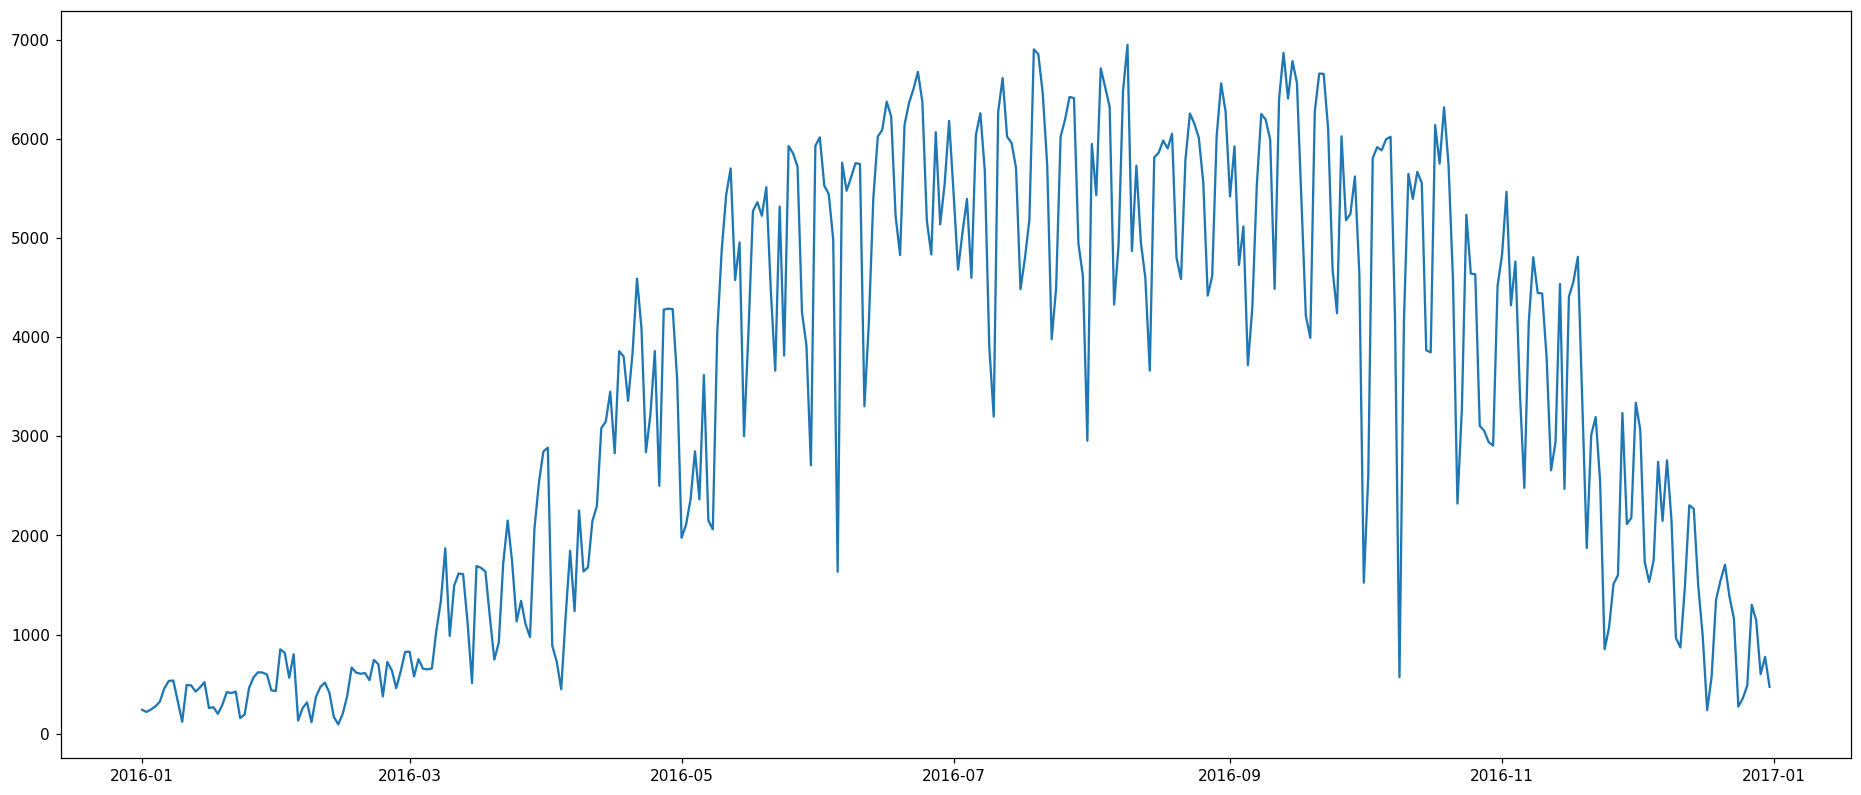

In [211]:
### dayly nb. of bike trips over the year

bostonC_used = bostonC.groupby(["date"])["trip_id"].nunique()
#bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(21,9), dpi=110) 

ax.plot(bostonC_used)

plt.show()

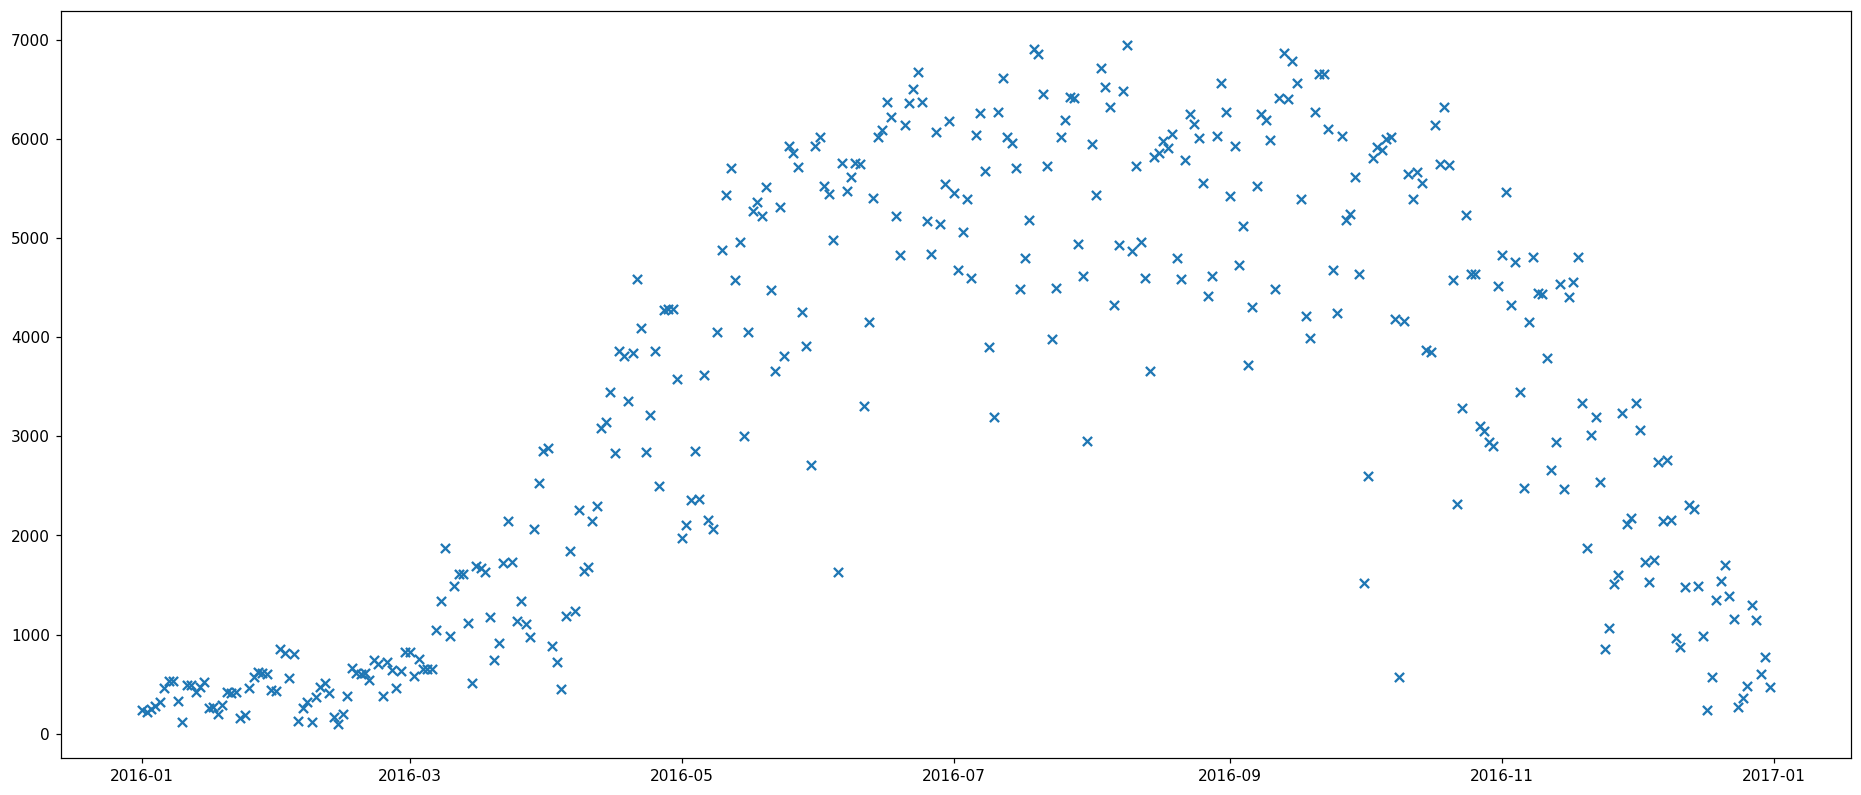

In [212]:
### dayly nb. of bike trips over the year

bostonC_used = bostonC.groupby(["date"])["trip_id"].nunique()

fig,ax = plt.subplots(figsize=(21,9), dpi=110) 

ax.scatter(bostonC_used.index, bostonC_used, marker="x")

plt.show()

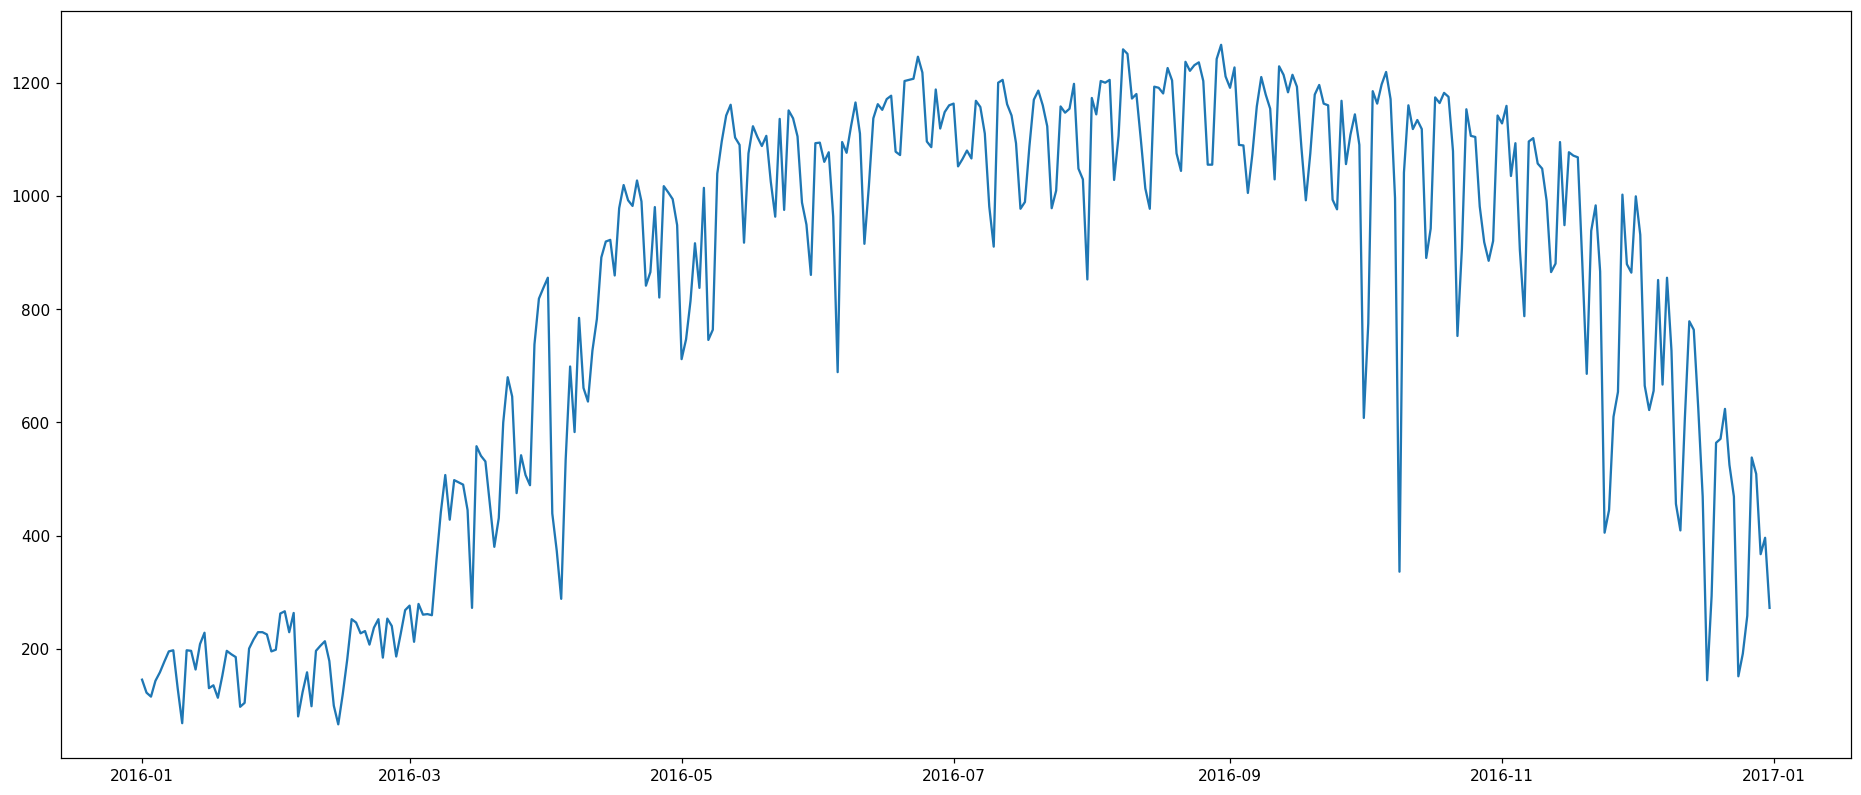

In [213]:
### dayly nb. of bikes used over the year

bostonC_used = bostonC.groupby(["date"])["bike_id"].nunique()
#bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(21,9), dpi=110) 

ax.plot(bostonC_used)

plt.show()

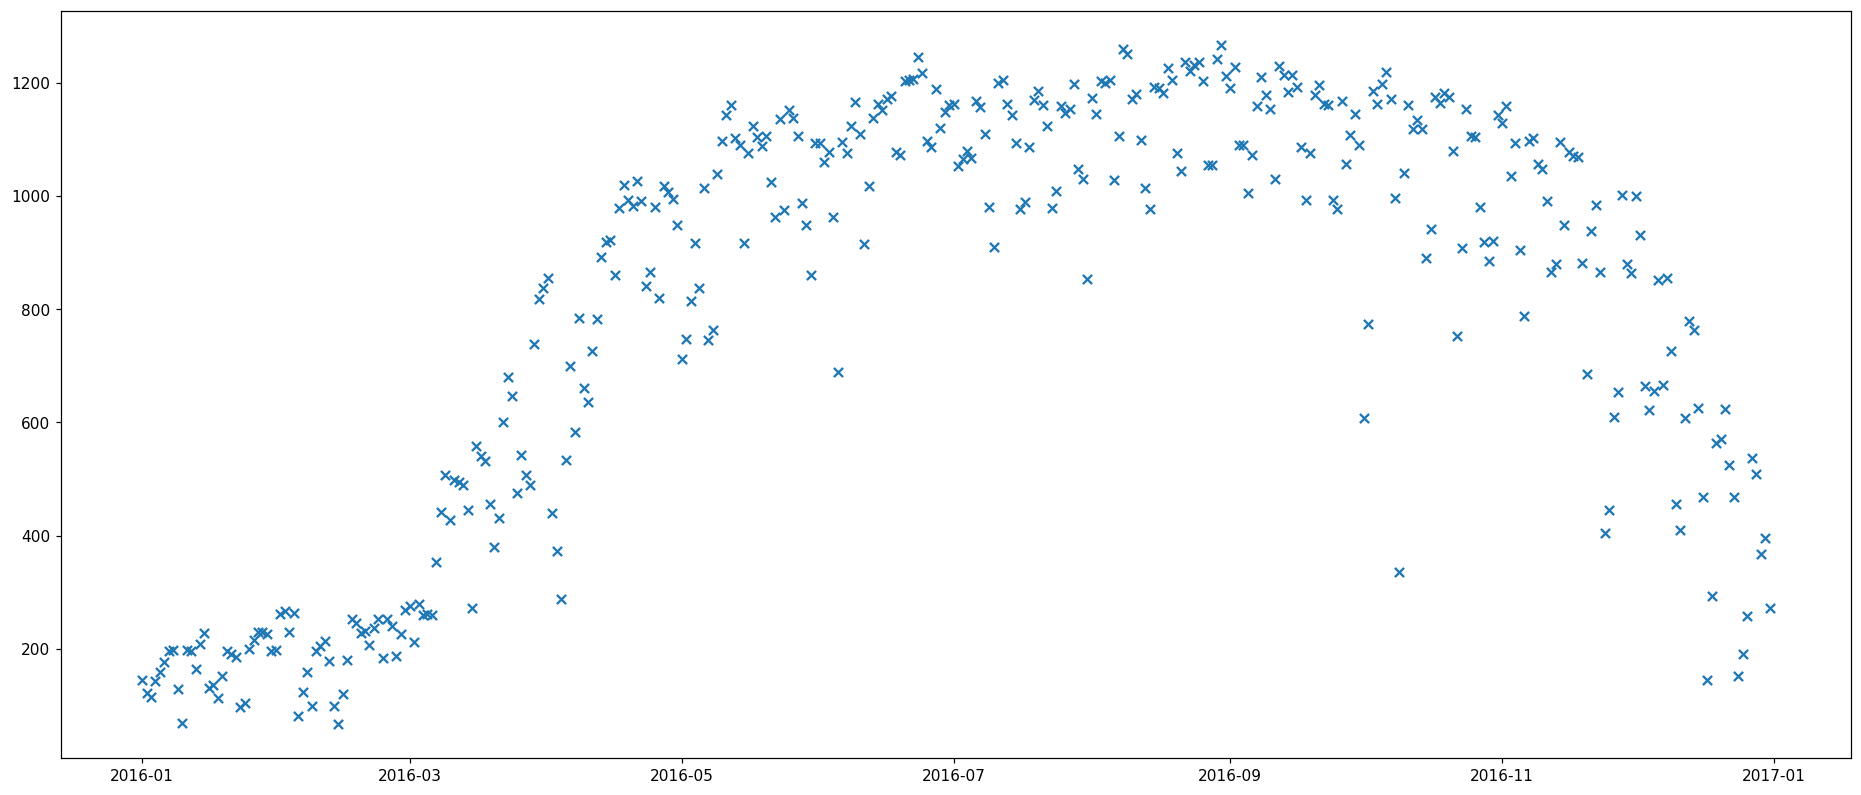

In [214]:
### dayly nb. of bikes used over the year

bostonC_used = bostonC.groupby(["date"])["bike_id"].nunique()

fig,ax = plt.subplots(figsize=(21,9), dpi=110) 

ax.scatter(bostonC_used.index, bostonC_used, marker="x")

plt.show()

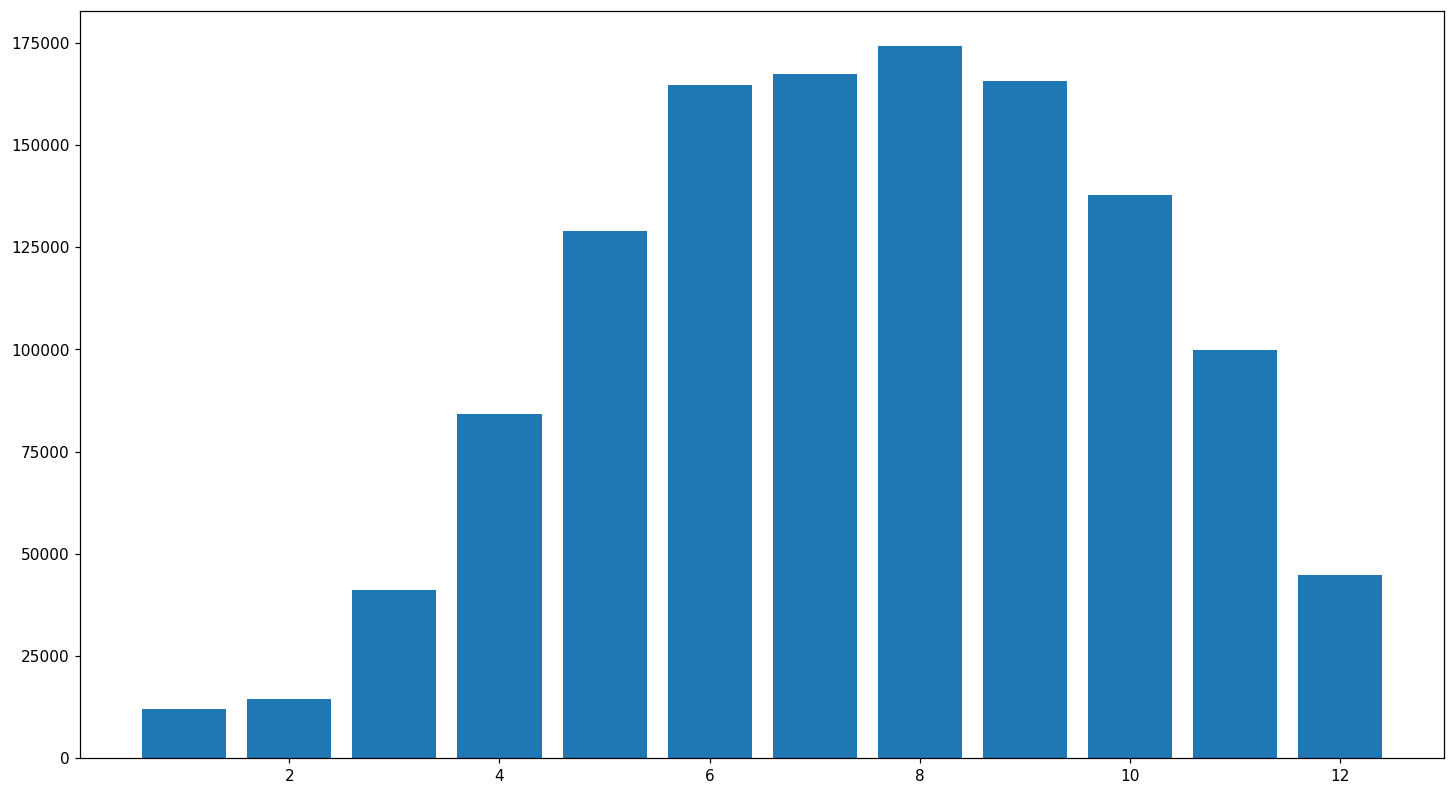

In [215]:
### monthly bike trips over the year

bostonC_used = bostonC.groupby(["month"])["trip_id"].nunique()

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

ax.bar(bostonC_used.index, bostonC_used)

plt.show()

In [216]:
bostonC["month"].value_counts()

8     174092
7     167281
9     165597
6     164553
10    137790
5     129080
11     99845
4      84113
12     44951
3      41158
2      14623
1      12038
Name: month, dtype: int64

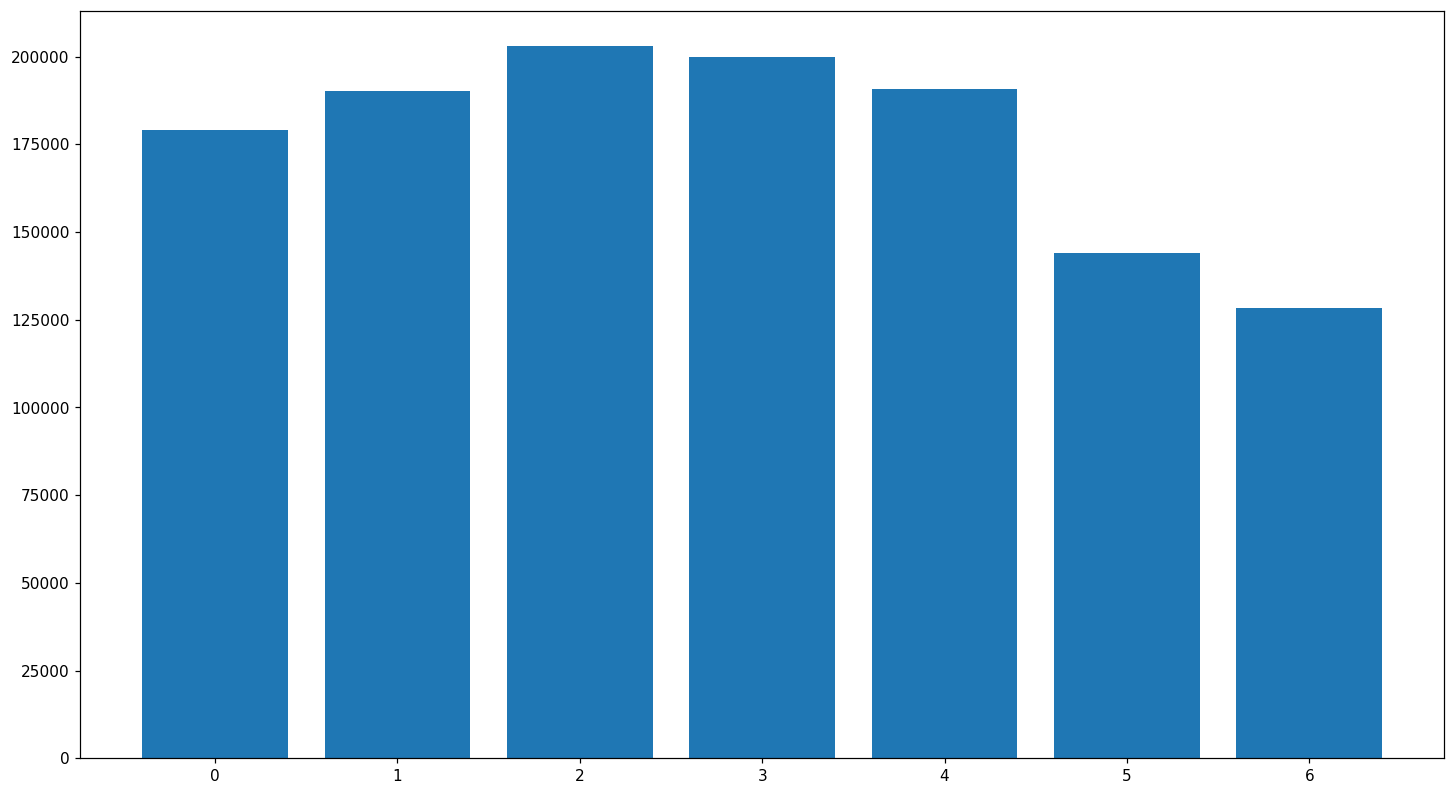

In [217]:
### weekdayly bike trips over the year (0 = Monday, 6 = Sunday)

bostonC_used = bostonC.groupby(["weekday"])["trip_id"].nunique()

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

ax.bar(bostonC_used.index, bostonC_used)

plt.show()

In [218]:
bostonC["weekday"].value_counts()

2    202905
3    199816
4    190813
1    190235
0    179028
5    144045
6    128279
Name: weekday, dtype: int64

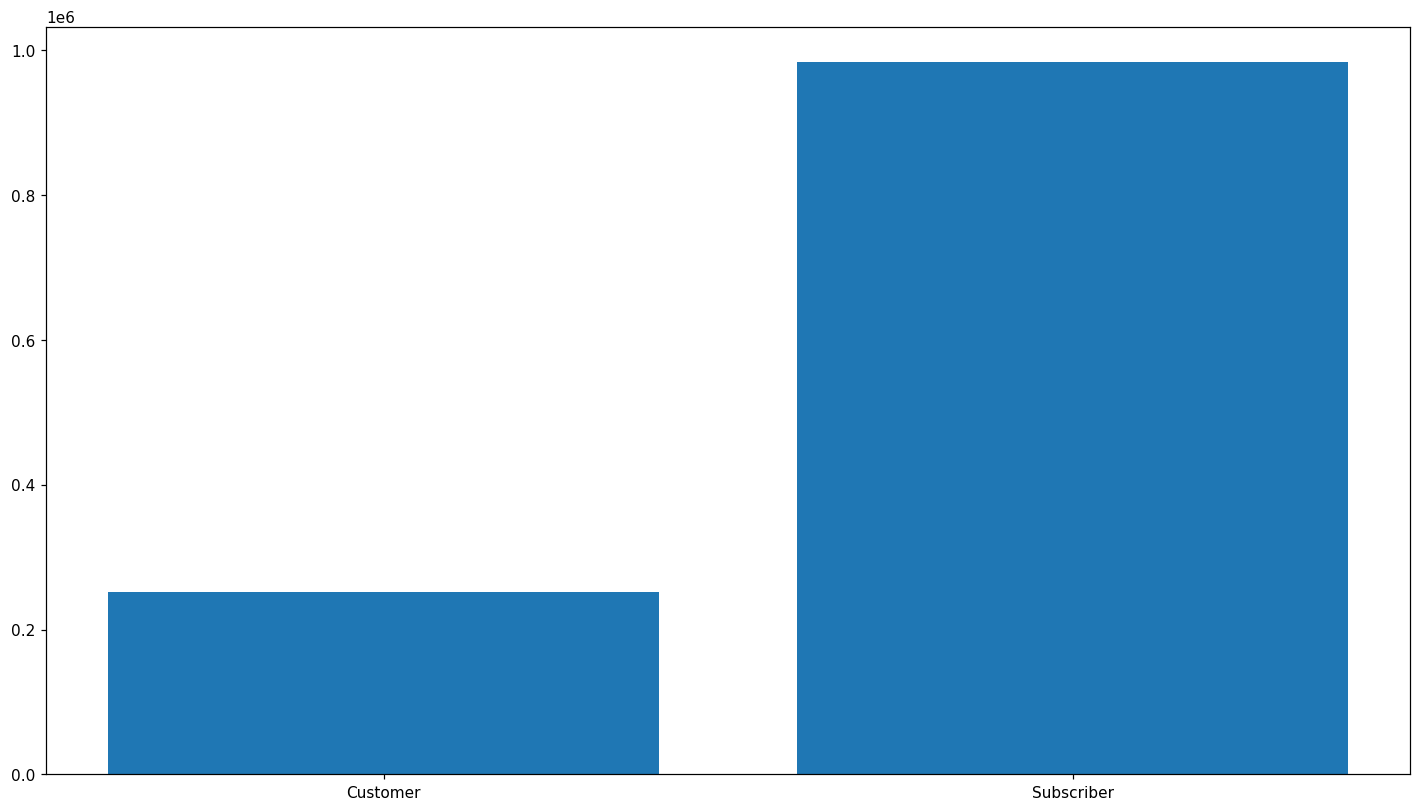

In [219]:
### nb. of bike trips of each user type over the year 
bostonC_used = bostonC.groupby(["user_type"])["trip_id"].nunique()

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

ax.bar(bostonC_used.index, bostonC_used)

plt.show()

In [220]:
bostonC["user_type"].value_counts()

Subscriber    983412
Customer      251709
Name: user_type, dtype: int64

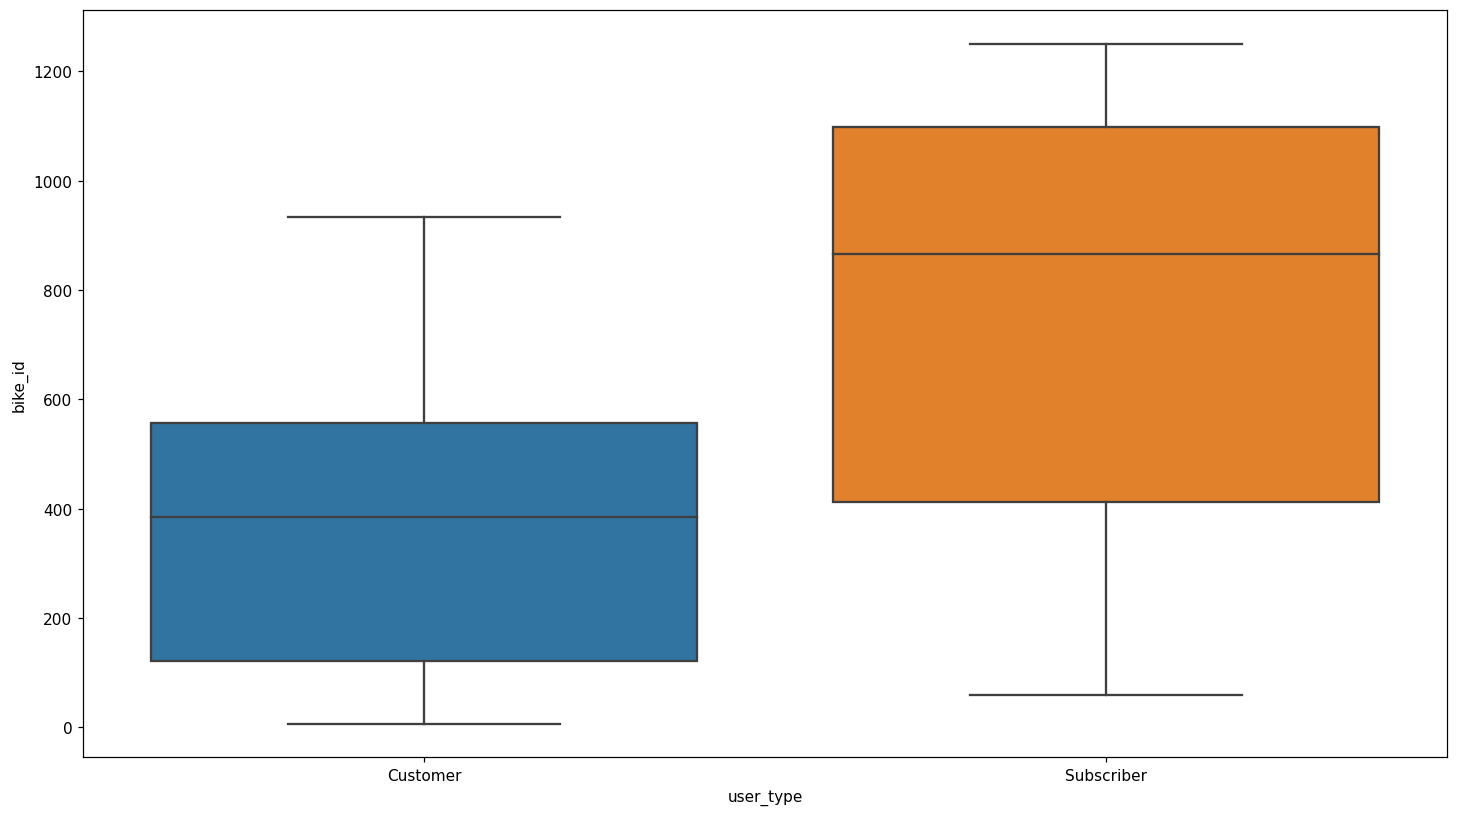

In [221]:
### bikes used per usertype

bostonC_used = bostonC.groupby(["date", "user_type"])["bike_id"].nunique()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["bike_id"],ax=ax)
plt.show()


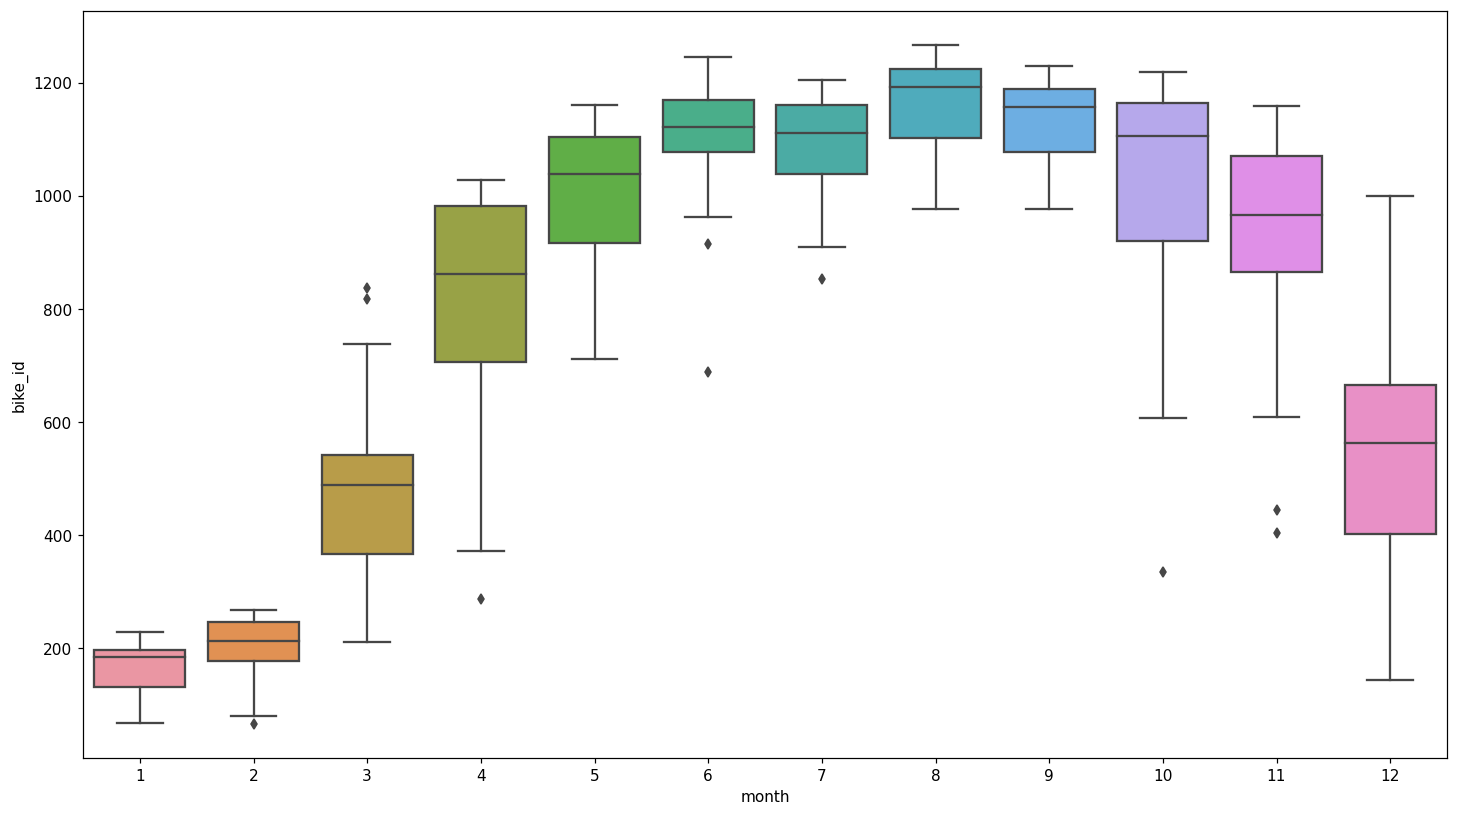

In [222]:
### bikes used per month

bostonC_used = bostonC.groupby(["date", "month"])["bike_id"].nunique()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["bike_id"],ax=ax)
plt.show()


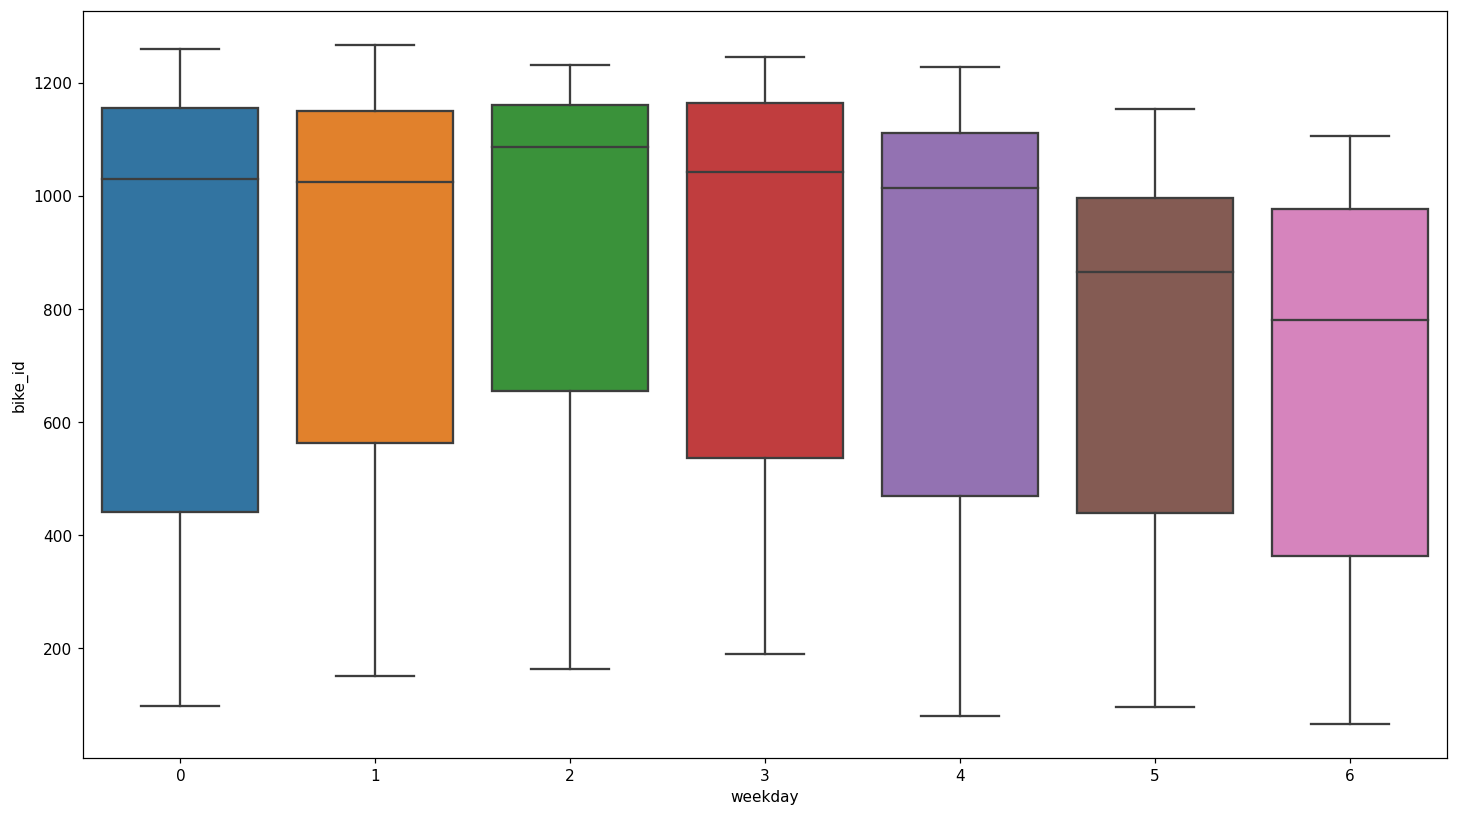

In [223]:
### bikes used per weekday

bostonC_used = bostonC.groupby(["date", "weekday"])["bike_id"].nunique()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["bike_id"],ax=ax)
plt.show()


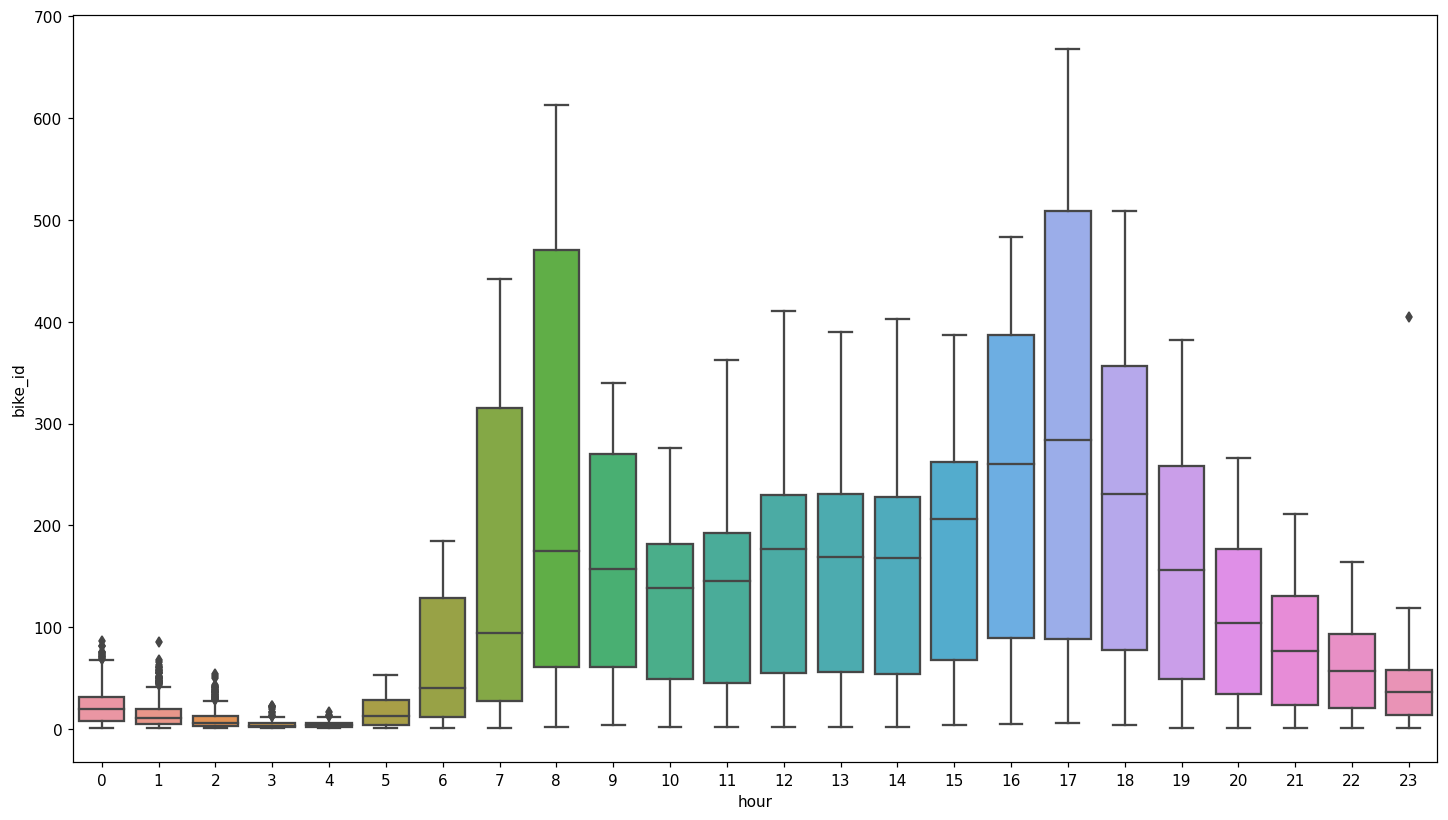

In [224]:
### bikes used per hour

bostonC_used = bostonC.groupby(["date", "hour"])["bike_id"].nunique()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["bike_id"],ax=ax)
plt.show()


In [225]:
bostonC["start_station_id"].value_counts()

67     35638
22     31507
68     24106
74     23159
80     21175
       ...  
216       43
209       31
219       23
153        2
158        1
Name: start_station_id, Length: 189, dtype: int64

In [226]:
bostonC["end_station_id"].value_counts()

67     36099
22     31800
80     29628
74     24335
68     23858
       ...  
215       36
209       21
219       12
153        2
158        1
Name: end_station_id, Length: 189, dtype: int64

In [227]:
bostonC.groupby('start_station_id').start_station_name.nunique()

start_station_id
1      1
3      2
4      2
5      2
6      2
      ..
215    2
216    1
217    1
218    2
219    2
Name: start_station_name, Length: 189, dtype: int64

In [228]:
bostonC.groupby('start_station_id').start_station_name.unique()

start_station_id
1                                [18 Dorrance Warehouse]
3      [Colleges of the Fenway, Colleges of the Fenwa...
4      [Tremont St. at Berkeley St., Tremont St at E ...
5      [Northeastern U / North Parking Lot, Northeast...
6      [Cambridge St. at Joy St., Cambridge St at Joy...
                             ...                        
215    [The Eddy at New Street, The Eddy - New St at ...
216                            [Glendon St at Condor St]
217    [Orient Heights T Stop - Bennington St at Sara...
218    [Watermark Seaport, Watermark Seaport - Boston...
219    [Central Square East Boston - Porter Street at...
Name: start_station_name, Length: 189, dtype: object

In [229]:

print(bostonC.sort_values("start_station_id")["start_station_name"].unique())

['18 Dorrance Warehouse' 'Colleges of the Fenway'
 'Colleges of the Fenway - Fenway at Avenue Louis Pasteur'
 'Tremont St at E Berkeley St' 'Tremont St. at Berkeley St.'
 'Northeastern U / North Parking Lot'
 'Northeastern University - North Parking Lot' 'Cambridge St. at Joy St.'
 'Cambridge St at Joy St' 'Fan Pier'
 'Union Square - Brighton Ave. at Cambridge St.'
 'Union Square - Brighton Ave at Cambridge St'
 'Agganis Arena - 925 Comm Ave.' 'Commonwealth Ave at Buick St'
 'B.U. Central - 725 Comm. Ave.' 'Longwood Ave / Binney St'
 'Longwood Ave at Binney St' 'Ruggles Station / Columbus Ave.'
 'Ruggles T Stop - Columbus Ave at Melnea Cass Blvd'
 'Boston Medical Center -  East Concord at Harrison Ave'
 'HMS / HSPH - Ave. Louis Pasteur at Longwood Ave.'
 'HMS/HSPH - Avenue Louis Pasteur at Longwood Ave'
 'Harvard Real Estate - Brighton Mills - 370 Western Ave'
 'Brighton Mills - 370 Western Ave' 'Back Bay / South End Station'
 'Back Bay T Stop - Dartmouth St at Stuart St'
 'Harvard Uni

In [230]:
print(bostonC.sort_values("start_station_id")["start_station_name"].nunique())

276


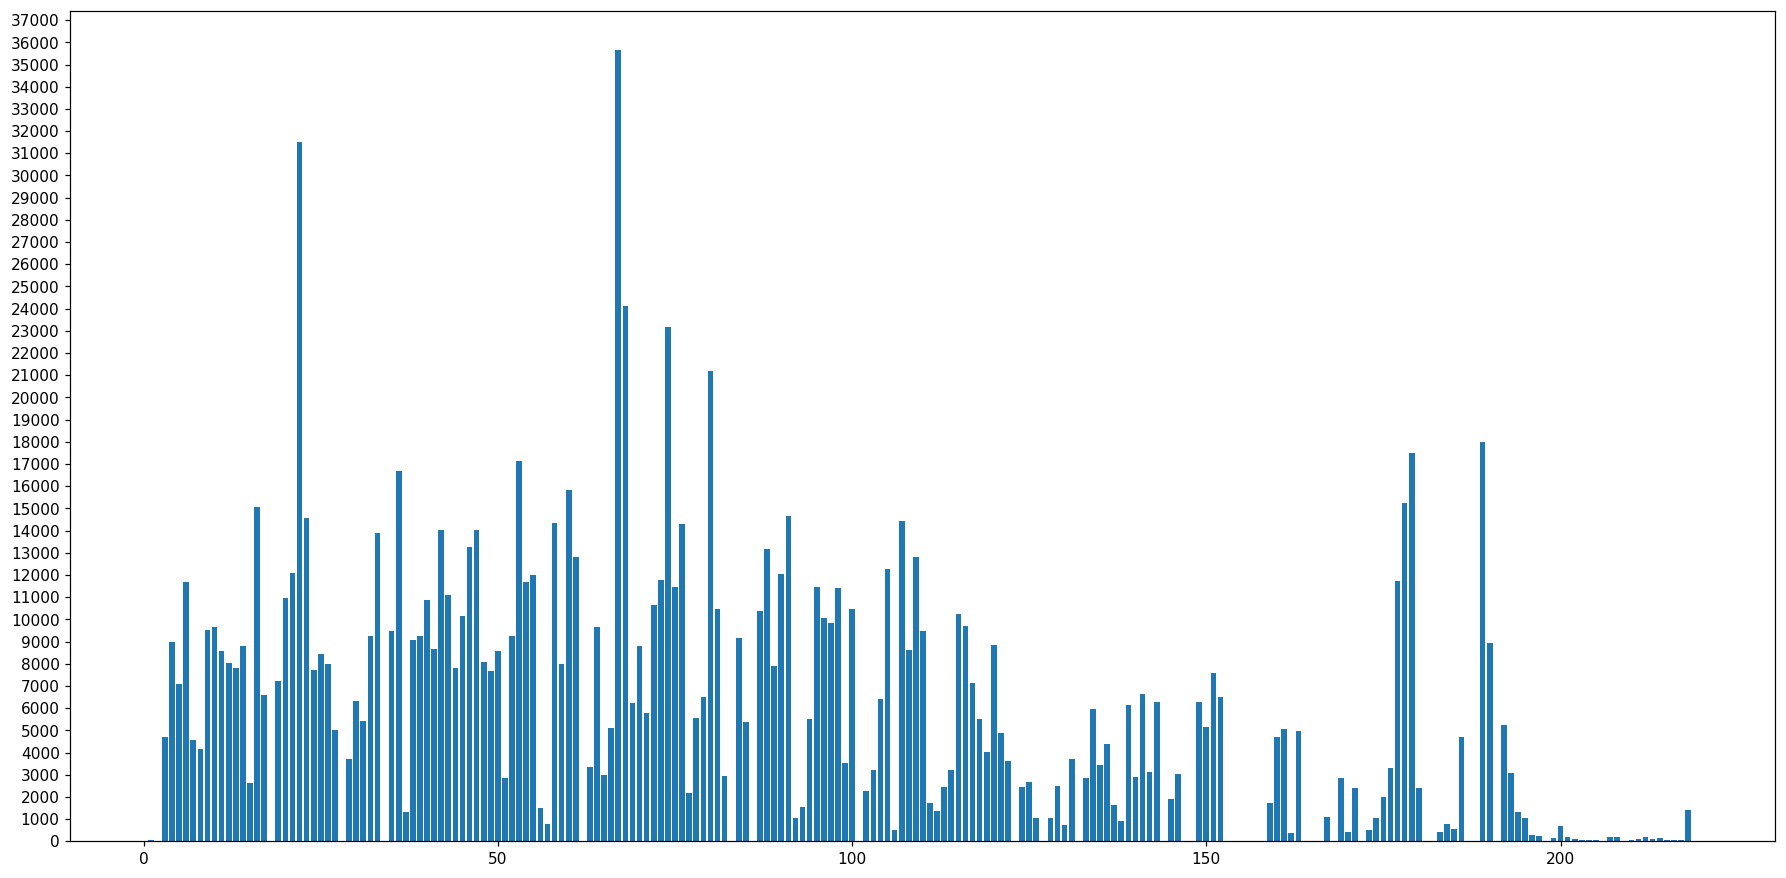

In [231]:
### nb. of trips from start_station
bostonS = bostonC.groupby(["start_station_id"])["trip_id"].nunique()

fig,ax = plt.subplots(figsize=(20,10), dpi=110) 

ax.bar(bostonS.index, bostonS)
ax.set_yticks(range(0,38000,1000))
#ax.set_xticks(range(0,220,1))


plt.show()

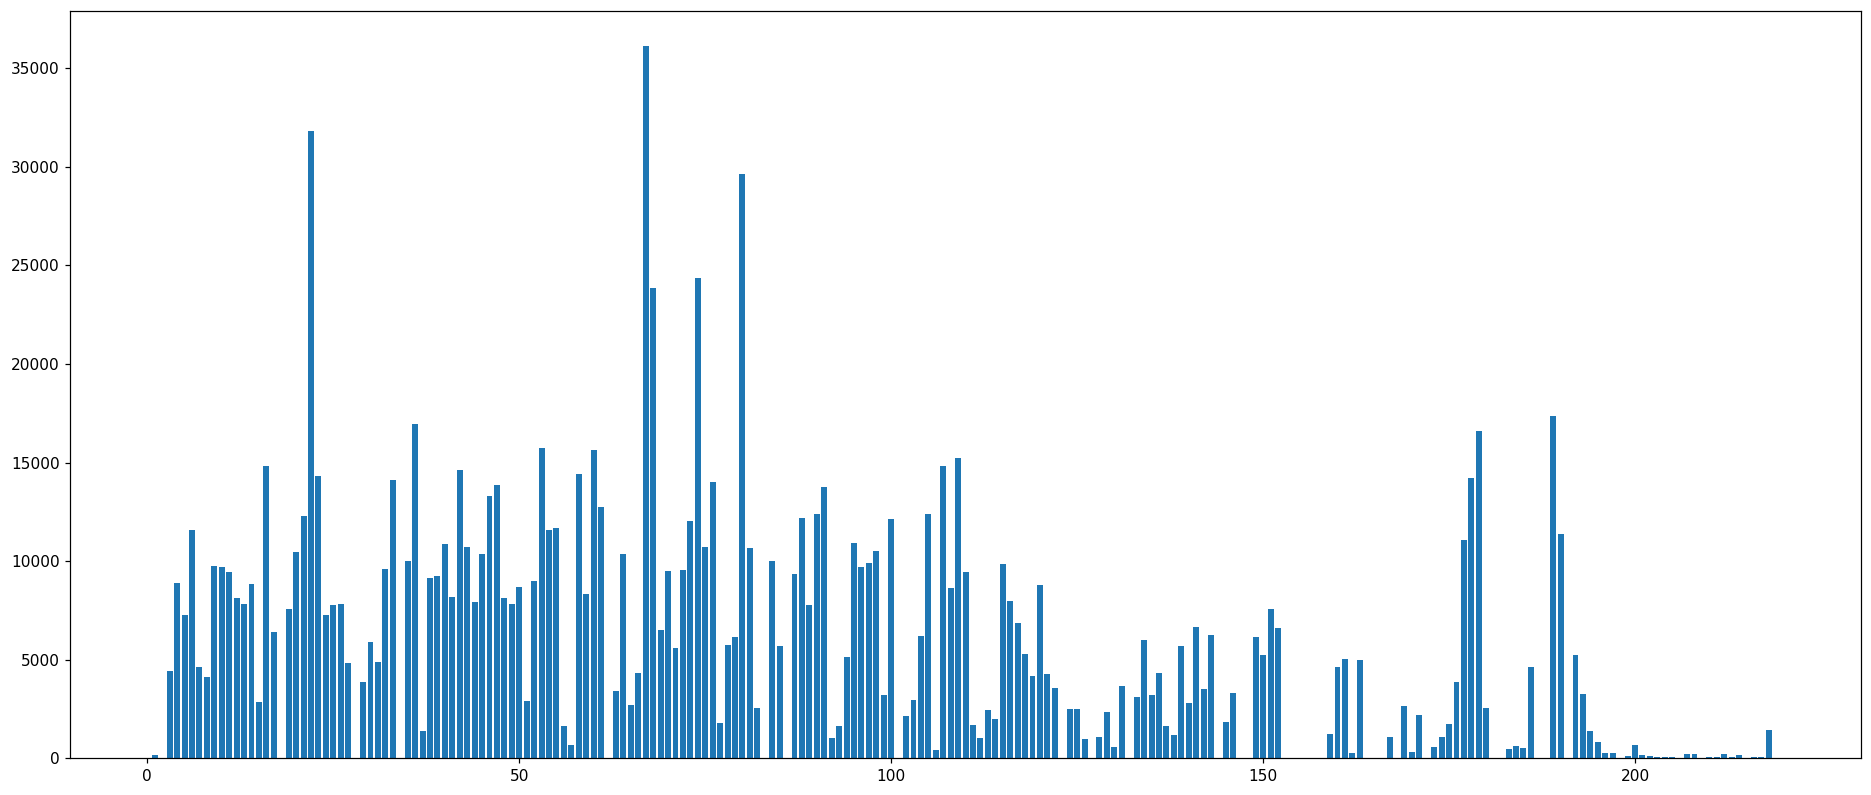

In [232]:
bostonS = bostonC.groupby(["end_station_id"])["trip_id"].nunique()

fig,ax = plt.subplots(figsize=(21,9), dpi=110) 

ax.bar(bostonS.index, bostonS)

plt.show()

###
### Import weather_hourly_boston data to weather Dataframe
###

In [233]:
weather = pd.read_csv("weather_hourly_boston.csv")
weather.info()

FileNotFoundError: [Errno 2] No such file or directory: 'weather_hourly_boston.csv'

### Null values, handling needed
###
### date_time needs to be converted to datetime 
### avg_temp calculation
### check data values for plausibility
### create keys for merging with weather data: date, hour, minute
### visualize some data for better understanding

In [ ]:
### nb. of rows with null
weather.isna().sum()

In [ ]:
### remove null
weather.dropna(inplace = True)

In [ ]:
### weather date_time change Dtype from object to date_time
weather["date_time"] = pd.to_datetime(weather["date_time"])

In [ ]:
### begin of 2016
dateY1 = datetime(year=2016, month=1, day=1, hour=0, minute= 0, second=0, microsecond=0)
print(dateY1)

In [ ]:
### end of 2016
dateY2 = datetime(year=2016, month=12, day=31, hour=23, minute= 59, second=59, microsecond=0)
print(dateY2)

In [ ]:
## only weather data from 2016
weather2016 = weather[(weather["date_time"] >= dateY1) & (weather["date_time"] <= dateY2)]
weather2016.reset_index(drop = True, inplace = True)
weather2016.info()

In [ ]:
weather2016["avg_temp"] = (weather2016["max_temp"] + weather2016["min_temp"]) / 2
weather2016

In [ ]:
weather2016["date"] = pd.DatetimeIndex(weather2016["date_time"]).date
weather2016["month"] = pd.DatetimeIndex(weather2016["date_time"]).month
#weather2016["weekday"] = pd.DatetimeIndex(weather2016["date_time"]).weekday
weather2016["hour"] = pd.DatetimeIndex(weather2016["date_time"]).hour
#weather2016["minute"] = pd.DatetimeIndex(weather2016["date_time"]).minute

In [ ]:
weather2016.info()

In [ ]:
### date type to datetime
weather2016["date"] = pd.to_datetime(weather2016["date"])
weather2016.info()

In [ ]:
### weather 2016 avg_temp max
weather2016["avg_temp"].max()

In [ ]:
### weather 2016 avg_temp min
weather2016["avg_temp"].min()

In [ ]:
### weather 2016 avg_temp mean.
weather2016["avg_temp"].mean()

In [ ]:
weather16 = weather2016.groupby(["date"])["precip"].sum()

fig,ax = plt.subplots(figsize=(24,10), dpi=110) 

ax.bar(weather16.index, weather16)

plt.show()

In [ ]:
### nb. of bike trips of each user type over the year 

weather16 = weather2016.groupby(["date"])["precip"].sum()

fig,ax = plt.subplots(figsize=(24,10), dpi=110) 

ax.scatter(weather16.index, weather16, marker="x")

plt.show()




In [ ]:
weather2016["precip"].value_counts()

In [ ]:
weather16 = weather2016.groupby(["month"])["precip"].sum()

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

ax.bar(weather16.index, weather16)

plt.show()



In [ ]:
fig, ax = plt.subplots(figsize = (21,9), dpi=110)

# Plotting the data
ax.plot(weather2016["date"],weather2016["avg_temp"])
ax.set_xlabel("Date")
ax.set_ylabel("Avg Temp")
plt.show()

In [ ]:
weather16_temp = weather2016.groupby(["date", "month"])["avg_temp"].max()
weather16_temp = pd.DataFrame(weather16_temp)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=weather16_temp.index.get_level_values(1), y=weather16_temp["avg_temp"],ax=ax)
plt.show()

In [ ]:
weather16_temp = weather2016.groupby(["date", "hour"])["avg_temp"].max()
weather16_temp = pd.DataFrame(weather16_temp)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=weather16_temp.index.get_level_values(1), y=weather16_temp["avg_temp"],ax=ax)
plt.show()

### merging the Dataframes

In [ ]:

data = pd.merge_asof(bostonC.sort_values("start_time"), weather2016.sort_values("date_time"), on="date", by="hour")



In [ ]:

data

In [ ]:
data.info()

In [ ]:
### nb. of rows with null
data.isna().sum()

# KPI

In [234]:
boston_user_type = boston.groupby('user_type')
print(boston_user_type)
len(boston_user_type)

2

In [238]:
boston_user_type.describe()

start_station_id                                                \
                      count       mean        std  min   25%   50%    75%   
user_type                                                                   
Customer           252264.0  73.675047  46.626524  1.0  40.0  67.0   98.0   
Subscriber         983939.0  79.125729  50.849708  1.0  39.0  72.0  109.0   

                  end_station_id             ... bike_id          \
              max          count       mean  ...     75%     max   
user_type                                    ...                   
Customer    219.0       252264.0  73.319312  ...  1258.0  1931.0   
Subscriber  219.0       983939.0  78.978546  ...  1335.0  1931.0   

           trip_duration                             \
                   count                       mean   
user_type                                             
Customer          252264  0 days 00:47:33.969829226   
Subscriber        983939  0 days 00:16:23.536705019   

                                                                           \
                                  std                min              25%   
user_type                                                                   
Customer    0 days 23:34:39.302651158    0 days 00:01:01  0 days 00:10:28   
Subscriber  0 days 05:24:25.576802813  -1 days +23:06:24  0 days 00:06:10   

                                                                 
                        50%              75%                max  
user_type                                                        
Customer    0 days 00:17:52  0 days 00:27:15  346 days 03:14:39  
Subscriber  0 days 00:09:49  0 days 00:15:34   89 days 23:03:02  

[2 rows x 32 columns]

In [243]:
# user_type_S = boston['Subscriber'].value_counts()
# I don't understand why the code above does not work. It can't find the 'Subscriber' column.

In [246]:
boston_user_type.count()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,trip_duration
user_type,,,,,,,,
Customer,252264,252264,252264,252264,252264,252264,252264,252264
Subscriber,983939,983939,983939,983939,983939,983939,983939,983939


In [248]:
# So since I struggle with the convenient formula, I decided to calculate KPI "manually". But I will still try to fix it!
user_type_C = 252264
user_type_S = 983939
users_total = user_type_C + user_type_S

print(user_type_C)
print(user_type_S)
print(users_total)

252264
983939
1236203


In [250]:
kpi_user_type = user_type_S / users_total

print(kpi_user_type)

# So this KPI shows the percentage of Subscribers (=regular users) in total amount of users. 
# It appears that almost 80% of users are Subscribers

0.7959364279167742


In [ ]:
# Next: fix the formula and calculate properly. Calculate hourly/daily/smth value + visualization